## Newton-Rahpson Method
</br> Implementing Newton - Rahpson Method for simple polynomials Iteration 
<br> **Notes:** I have not find the method to automatically differentiate the function. We can either manually calculate it or implement a function that derives the function 

In [25]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

def f(x):
    return x**2 - 2

def der_f(x):
    return  2*x 

def newthon_method(x,n):
    """ x = Startwert 
            n = Iterations Step """
    Iterated_Values = [x]
    for i in range (n):
        if der_f(x) == 0:
            raise ValueError("Division by Zero")
            break
        else:
            x1 = x - (f(x)/der_f(x))
            Iterated_Values.append(x1)
            x = x1 
            
    return Iterated_Values 


In [26]:
newthon_method(10,10)

[10,
 5.1,
 2.7460784313725486,
 1.7371948743795982,
 1.444238094866232,
 1.4145256551487377,
 1.4142135968022693,
 1.4142135623730954,
 1.4142135623730951,
 1.414213562373095,
 1.4142135623730951]

#### Iterated Values from Newton Method
<br> We see that the value converges to the exact value just through few iterations. *To prove that our **assumption** is true* , we need to analyze it further with **Experimental Order of Convergence (EOC)** 

<br> *The Experimental Order of Convergence* **(EOC)** tells us how the order of convergence from an Iteration. Newton- Rhapson Method will have a **local quadratic convergence** in an intervall close to the fixpoint. 

In [35]:
Iterated = newthon_method(10,10)
x = np.sqrt(2)
def EOC(array, x):
    EOC = [None,None]
    for i in range(len(array)-2):
            a = abs(array[i+1] - x)/abs(array[i+2] - x)
            b = abs(array[i] - x)/abs(array[i+1] - x)
            eoc = np.log(a)/np.log(b)
            EOC.append(eoc)
            
    return EOC

In [36]:
EOC(Iterated,x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


[None,
 None,
 1.2037307219091022,
 1.3918220269630648,
 1.6767918626585339,
 1.9222548663662735,
 1.9954477610362797,
 2.0696859426354237,
 inf,
 nan,
 nan]

In [37]:
Exp_Convergence = EOC(Iterated,x)
print(len(Exp_Convergence))
print(len(Iterated))

11
11


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [47]:
Iterated_Dict = {"Iterations" : Iterated, "Experimental Convergence Order" : Exp_Convergence}
Iterated_DF = pd.DataFrame.from_dict(Iterated_Dict, orient="columns")
Iterated_DF

,Iterations,Experimental Convergence Order
0,10.000000,NaN
1,5.100000,NaN
2,2.746078,1.203731
3,1.737195,1.391822
4,1.444238,1.676792
5,1.414526,1.922255
6,1.414214,1.995448
7,1.414214,2.069686
8,1.414214,inf
9,1.414214,NaN


### Visualisation of Newton-Method's iterated values 
</br> We can see that after the *4th or 5th iterations*, the slope becomes constant. 
<br> When we try to compare with our "Iterated_DF (Dataframe)", the *6th / 7th Iteration* has a quadratic convergence. 

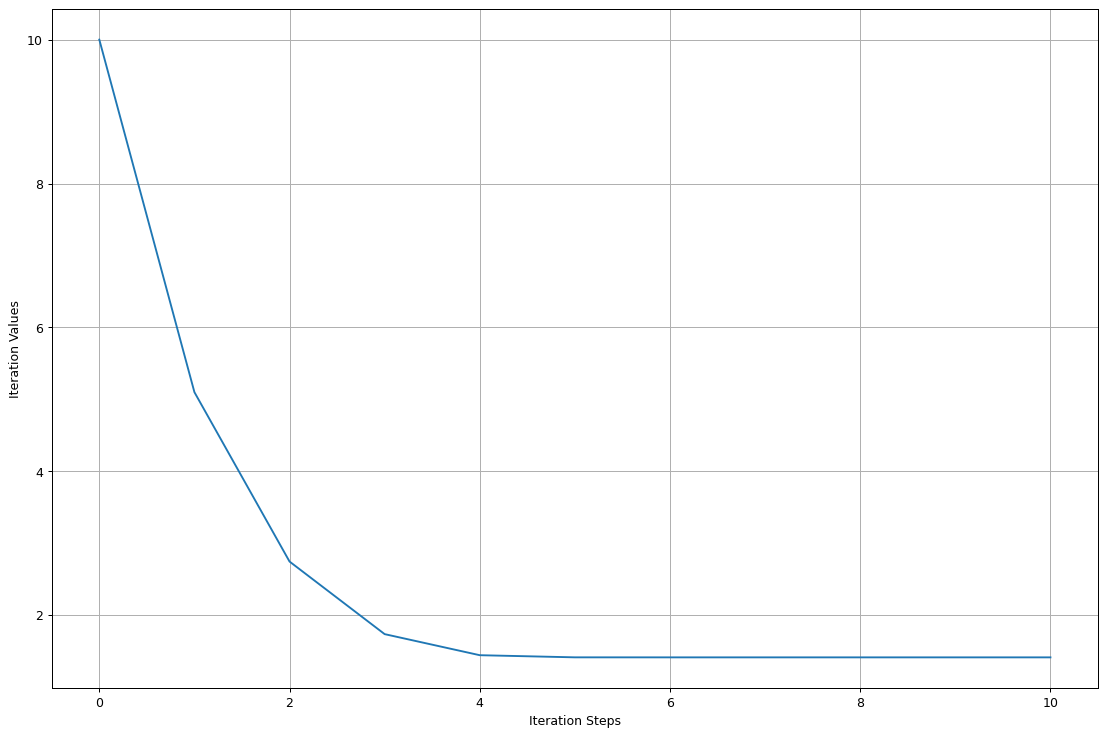

In [64]:
Steps = np.arange(len(Iterated))
Values = Iterated
plt.figure(figsize=(15,10), dpi = 90)
plt.plot(Steps,Values)
plt.xlabel("Iteration Steps")
plt.ylabel("Iteration Values")
plt.grid()
plt.show()